In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

plt.gray()

<Figure size 432x288 with 0 Axes>

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


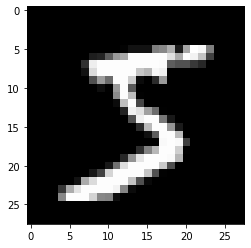

5


In [ ]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [ ]:
tf.one_hot(5, 10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
def to_onehot(v, d):
  v_onehot = []
  for y in v:
    v_onehot.append(tf.one_hot(y, d))
  return v_onehot

y_train_onehot = to_onehot(y_train,10)
y_test_onehot = to_onehot(y_test,10)

In [ ]:
y_train_onehot = tf.one_hot(y_train, 10)
y_test_onehot = tf.one_hot(y_test, 10)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print(tf.reduce_min(x_train), tf.reduce_max(x_train))

tf.Tensor(0.0, shape=(), dtype=float64) tf.Tensor(1.0, shape=(), dtype=float64)


In [ ]:
_, height, width = x_train.shape

print('height = ', height, 'width = ', width)

height =  28 width =  28


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test_onehot))

In [ ]:
train_dataset = train_dataset.shuffle(x_train.shape[0], reshuffle_each_iteration=True)
test_dataset = test_dataset.shuffle(x_test.shape[0], reshuffle_each_iteration=True)

In [ ]:
train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(32)

(32, 28, 28) (32, 10)


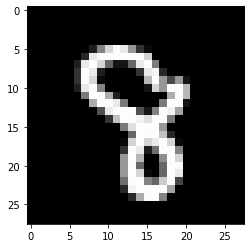

In [ ]:
for el in train_dataset.take(1):
  print(el[0].shape, el[1].shape)

  plt.imshow(el[0][0])
  plt.show()

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation='sigmoid', kernel_initializer='zeros')(x)
x = tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='zeros')(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='zeros')(x)

dummy_model = tf.keras.Model(input_im, x)

dummy_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dummy_model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

In [ ]:
h_dummy = dummy_model.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3030 - accuracy: 0.1078 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.1083 - val_loss: 2.3036 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3029 - accuracy: 0.1068 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.1080 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3029 - accuracy: 0.1089 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3026 - accuracy: 0.1089 - val_loss: 2.3029 - val_accuracy: 0.0974
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.1088 - val_loss: 2.3017 - val_ac

In [ ]:
def plot_history(h):
  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

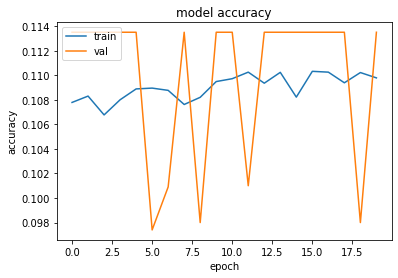

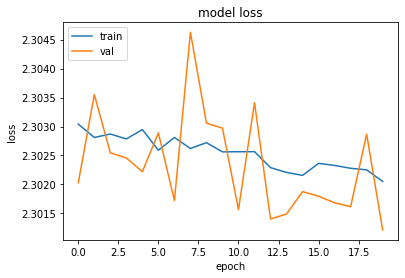

In [ ]:
plot_history(h_dummy)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation='sigmoid', kernel_initializer='zeros')(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='zeros')(x)

not_that_deep_model = tf.keras.Model(input_im, x)

not_that_deep_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
not_that_deep_model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

h_not_that_deep = not_that_deep_model.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3088 - accuracy: 0.1027 - val_loss: 2.3120 - val_accuracy: 0.1009
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3086 - accuracy: 0.1025 - val_loss: 2.3063 - val_accuracy: 0.1010
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3079 - accuracy: 0.1068 - val_loss: 2.3050 - val_accuracy: 0.1032
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3073 - accuracy: 0.1057 - val_loss: 2.3062 - val_accuracy: 0.1010
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3063 - accuracy: 0.1080 - val_loss: 2.3067 - val_accuracy: 0.0980
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3056 - accuracy: 0.1100 - val_loss: 2.3049 - val_accuracy: 0.1010
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3030 - accuracy: 0.1134 - val_loss: 2.2992 - val_acc

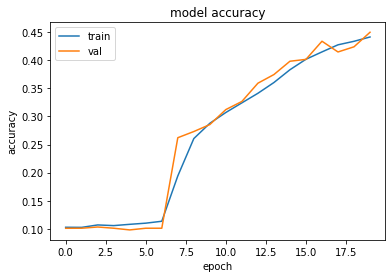

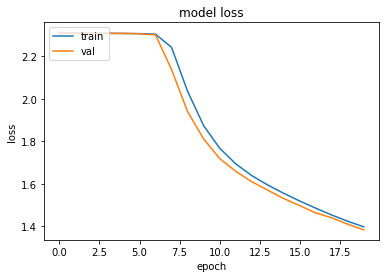

In [ ]:
plot_history(h_not_that_deep)

In [ ]:
for x in train_dataset.take(1):
  dummy_model(x)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
x = tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform')(x)

better_model = tf.keras.Model(input_im, x)

better_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
better_model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

h_better = better_model.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 2.1159 - accuracy: 0.4306 - val_loss: 1.8156 - val_accuracy: 0.6582
Epoch 2/20
1875/1875 [==============================] - 10s 6ms/step - loss: 1.4029 - accuracy: 0.6919 - val_loss: 1.0380 - val_accuracy: 0.7608
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8718 - accuracy: 0.7895 - val_loss: 0.7226 - val_accuracy: 0.8250
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6584 - accuracy: 0.8313 - val_loss: 0.5786 - val_accuracy: 0.8485
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5480 - accuracy: 0.8564 - val_loss: 0.4945 - val_accuracy: 0.8682
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4804 - accuracy: 0.8710 - val_loss: 0.4413 - val_accuracy: 0.8786
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4358 - accuracy: 0.8810 - val_loss: 0.4033 - val_ac

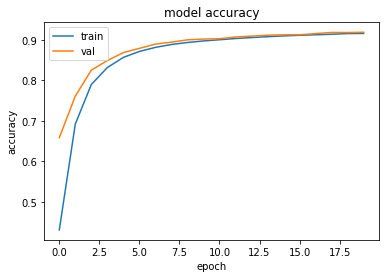

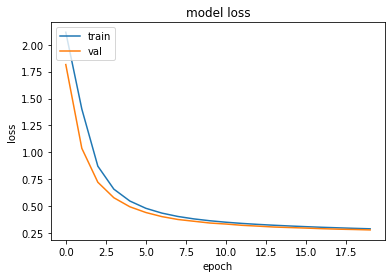

In [ ]:
plot_history(h_better)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

good_model = tf.keras.Model(input_im, x)

good_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
good_model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

h_good = good_model.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5360 - accuracy: 0.8569 - val_loss: 0.3086 - val_accuracy: 0.9094
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2648 - accuracy: 0.9254 - val_loss: 0.2266 - val_accuracy: 0.9352
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2121 - accuracy: 0.9402 - val_loss: 0.1891 - val_accuracy: 0.9444
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1783 - accuracy: 0.9493 - val_loss: 0.1638 - val_accuracy: 0.9518
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1540 - accuracy: 0.9560 - val_loss: 0.1471 - val_accuracy: 0.9575
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1349 - accuracy: 0.9623 - val_loss: 0.1362 - val_accuracy: 0.9592
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1201 - accuracy: 0.9664 - val_loss: 0.1227 - val_ac

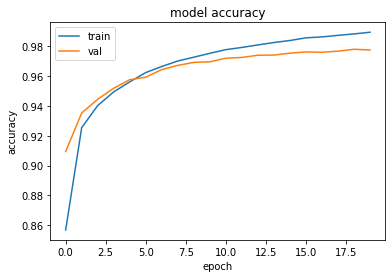

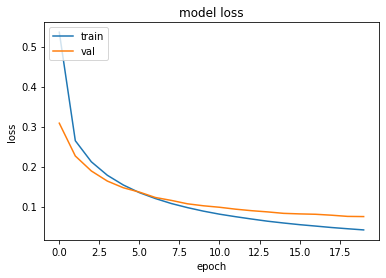

In [ ]:
plot_history(h_good)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation='relu', kernel_initializer='he_uniform', kernel_regularizer = 'l2')(x)
x = tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform', kernel_regularizer = 'l2')(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

good_model_2 = tf.keras.Model(input_im, x)

good_model_2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
good_model_2.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

h_good_2 = good_model_2.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 7.6941 - accuracy: 0.8552 - val_loss: 5.2018 - val_accuracy: 0.9135
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 3.8158 - accuracy: 0.9146 - val_loss: 2.7033 - val_accuracy: 0.9244
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 2.0574 - accuracy: 0.9231 - val_loss: 1.5242 - val_accuracy: 0.9305
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 1.2210 - accuracy: 0.9287 - val_loss: 0.9631 - val_accuracy: 0.9306
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8178 - accuracy: 0.9330 - val_loss: 0.6866 - val_accuracy: 0.9354
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6197 - accuracy: 0.9366 - val_loss: 0.5482 - val_accuracy: 0.9395
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5194 - accuracy: 0.9395 - val_loss: 0.4766 - v

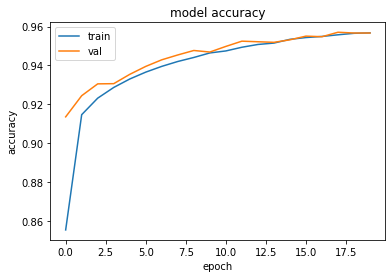

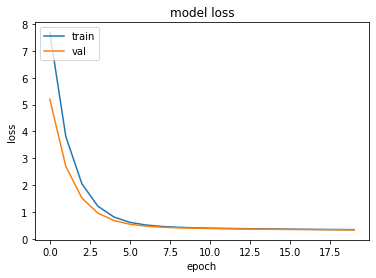

In [ ]:
plot_history(h_good_2)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

good_model_3 = tf.keras.Model(input_im, x)

good_model_3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_____________________________________________________

In [ ]:
good_model_3.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

h_good_3 = good_model_3.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6186 - accuracy: 0.8213 - val_loss: 0.2841 - val_accuracy: 0.9210
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3067 - accuracy: 0.9101 - val_loss: 0.2191 - val_accuracy: 0.9391
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2446 - accuracy: 0.9297 - val_loss: 0.1810 - val_accuracy: 0.9492
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2066 - accuracy: 0.9401 - val_loss: 0.1580 - val_accuracy: 0.9537
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1840 - accuracy: 0.9457 - val_loss: 0.1441 - val_accuracy: 0.9572
Epoch 6/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1635 - accuracy: 0.9523 - val_loss: 0.1301 - val_accuracy: 0.9607
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1497 - accuracy: 0.9561 - val_loss: 0.1206 - val_

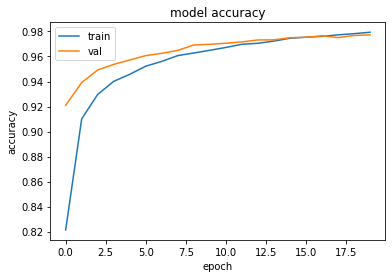

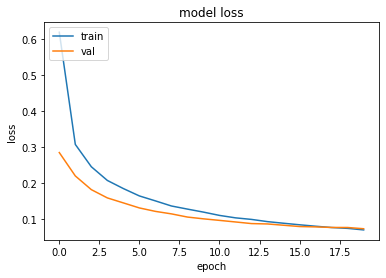

In [ ]:
plot_history(h_good_3)

In [ ]:
#good_model_3(x, training = False)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

good_model_4 = tf.keras.Model(input_im, x)

good_model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 batch_normalization (BatchN  (None, 400)              1600      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 100)               40100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                             

In [ ]:
good_model_4.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

h_good_4 = good_model_4.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3436 - accuracy: 0.8982 - val_loss: 0.1625 - val_accuracy: 0.9513
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1695 - accuracy: 0.9508 - val_loss: 0.1211 - val_accuracy: 0.9632
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1255 - accuracy: 0.9632 - val_loss: 0.1042 - val_accuracy: 0.9678
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0987 - accuracy: 0.9710 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0811 - accuracy: 0.9767 - val_loss: 0.0871 - val_accuracy: 0.9740
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0686 - accuracy: 0.9803 - val_loss: 0.0829 - val_accuracy: 0.9737
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0580 - accuracy: 0.9836 - val_loss: 0.0820 - val_accur

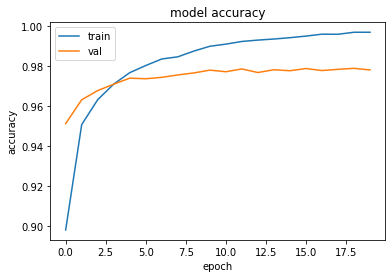

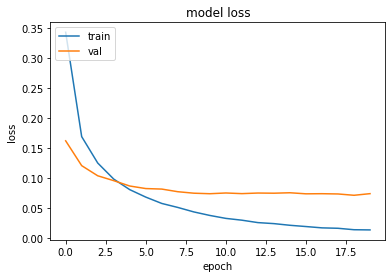

In [ ]:
plot_history(h_good_4)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(100, activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

good_model_5 = tf.keras.Model(input_im, x)

good_model_5.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 batch_normalization_2 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               40100     
                                                           

In [ ]:
good_model_5.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

h_good_5 = good_model_5.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4383 - accuracy: 0.8798 - val_loss: 0.1969 - val_accuracy: 0.9471
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2098 - accuracy: 0.9414 - val_loss: 0.1423 - val_accuracy: 0.9606
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1593 - accuracy: 0.9545 - val_loss: 0.1181 - val_accuracy: 0.9655
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1288 - accuracy: 0.9634 - val_loss: 0.1021 - val_accuracy: 0.9687
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1084 - accuracy: 0.9685 - val_loss: 0.0928 - val_accuracy: 0.9724
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0948 - accuracy: 0.9730 - val_loss: 0.0839 - val_accuracy: 0.9746
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0824 - accuracy: 0.9770 - val_loss: 0.0800 - val_accu

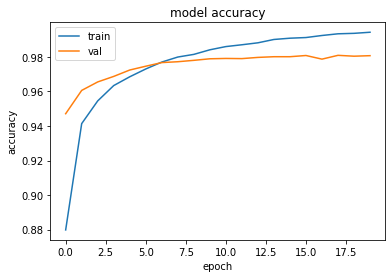

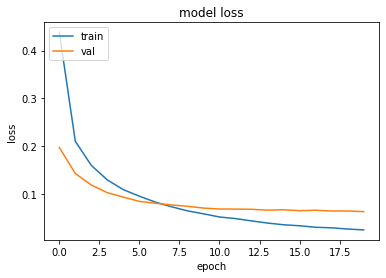

In [ ]:
plot_history(h_good_5)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(100, activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

good_model_6 = tf.keras.Model(input_im, x)

good_model_6.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 400)               0         
                                                           

In [ ]:
good_model_6.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics='accuracy')

h_good_6 = good_model_6.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5684 - accuracy: 0.8367 - val_loss: 0.2349 - val_accuracy: 0.9310
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2875 - accuracy: 0.9168 - val_loss: 0.1669 - val_accuracy: 0.9496
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2266 - accuracy: 0.9332 - val_loss: 0.1408 - val_accuracy: 0.9573
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1927 - accuracy: 0.9436 - val_loss: 0.1253 - val_accuracy: 0.9612
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1717 - accuracy: 0.9483 - val_loss: 0.1168 - val_accuracy: 0.9635
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1548 - accuracy: 0.9535 - val_loss: 0.1090 - val_accuracy: 0.9665
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1400 - accuracy: 0.9580 - val_loss: 0.1019 - val_ac

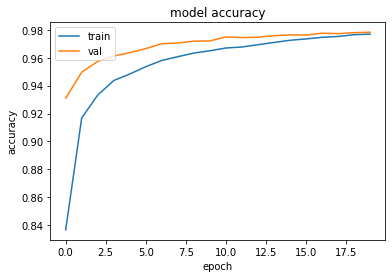

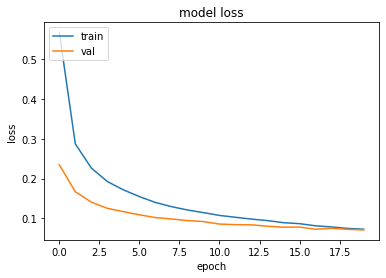

In [ ]:
plot_history(h_good_6)

In [ ]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(100, activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

good_model_adam = tf.keras.Model(input_im, x)

good_model_adam.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 batch_normalization (BatchN  (None, 400)              1600      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 400)               0         
                                                             

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

good_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_good_adam = good_model_adam.fit(train_dataset, validation_data = test_dataset, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2624 - accuracy: 0.9209 - val_loss: 0.1283 - val_accuracy: 0.9583
Epoch 2/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1367 - accuracy: 0.9573 - val_loss: 0.0794 - val_accuracy: 0.9753
Epoch 3/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1089 - accuracy: 0.9663 - val_loss: 0.0821 - val_accuracy: 0.9750
Epoch 4/6
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0936 - accuracy: 0.9700 - val_loss: 0.0865 - val_accuracy: 0.9733
Epoch 5/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0782 - accuracy: 0.9747 - val_loss: 0.0652 - val_accuracy: 0.9789
Epoch 6/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0733 - accuracy: 0.9762 - val_loss: 0.0605 - val_accuracy: 0.9812


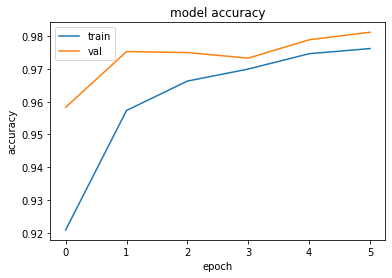

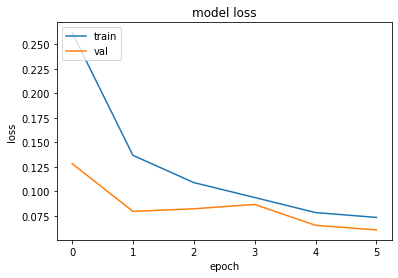

In [ ]:
plot_history(h_good_adam)